<a href="https://colab.research.google.com/github/janvi740/CAD_Fraud-Detection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1U6sln-F7QDf1LFgtPz11G5qKCs4Wh_AK/view?usp=sharing'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('card_transdata.csv') 
 
df = pd.read_csv('card_transdata.csv')
print(df)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
print("Dataset shape :- \n", df.shape)
# This tells us about the shape of the data. This tells that how many columns and rows are there in data file

Dataset shape :- 
 (1000000, 8)


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
repeatretailer = len(df[df.repeat_retailer ==1])
nonrepeatretailer = len(df[df.repeat_retailer == 0])

print('Cases count in total')
print('///////////-------------------///////////////')
print('Total Repeat retailer is :-', repeatretailer)
print('Total NonRepeat retailer is :-', nonrepeatretailer)

Cases count in total
///////////-------------------///////////////
Total Repeat retailer is :- 881536
Total NonRepeat retailer is :- 118464


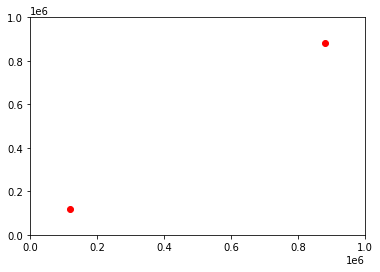

In [ ]:
plt.plot([repeatretailer,nonrepeatretailer], [881536,118464], 'ro')
plt.axis([0, 1000000, 0, 1000000])
plt.show()

In [ ]:
frauddetected = len(df[df.fraud == 1])
fraudnotdetected = len(df[df.fraud == 0])
print('Fraud and Not Fraud Cases in Total')
print('Total Fraud Reported :-', frauddetected)
print('Total NotFraud Reported :-', fraudnotdetected)

Fraud and Not Fraud Cases in Total
Total Fraud Reported :- 87403
Total NotFraud Reported :- 912597


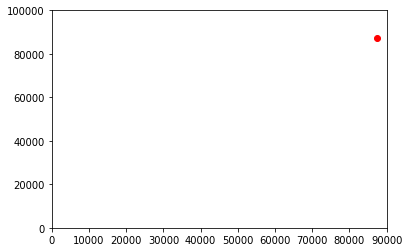

In [ ]:
plt.plot([frauddetected,fraudnotdetected], [87403,912597], 'ro')
plt.axis([0, 90000, 0, 100000])
plt.show()

In [ ]:
chipused = len(df[df.used_chip == 1])
chipnotused = len(df[df.used_chip == 0])
print('Count for chip used ')
print('Chip used  :-', chipused)
print('Chip not used :-', chipnotused)

Count for chip used 
Chip used  :- 350399
Chip not used :- 649601


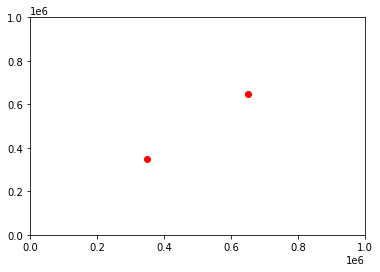

In [ ]:
plt.plot([chipused,chipnotused], [350399,649601], 'ro')
plt.axis([0, 1000000, 0, 1000000])
plt.show()

In [ ]:
onlineorderplaced = len(df[df.online_order == 1])
onlineordernotplaced = len(df[df.online_order == 0])
print('Total individual count for online and offline order placed ')
print('Online order placed  :-', onlineorderplaced)
print('Online order placed :-', onlineordernotplaced)

Total individual count for online and offline order placed 
Online order placed  :- 650552
Online order placed :- 349448


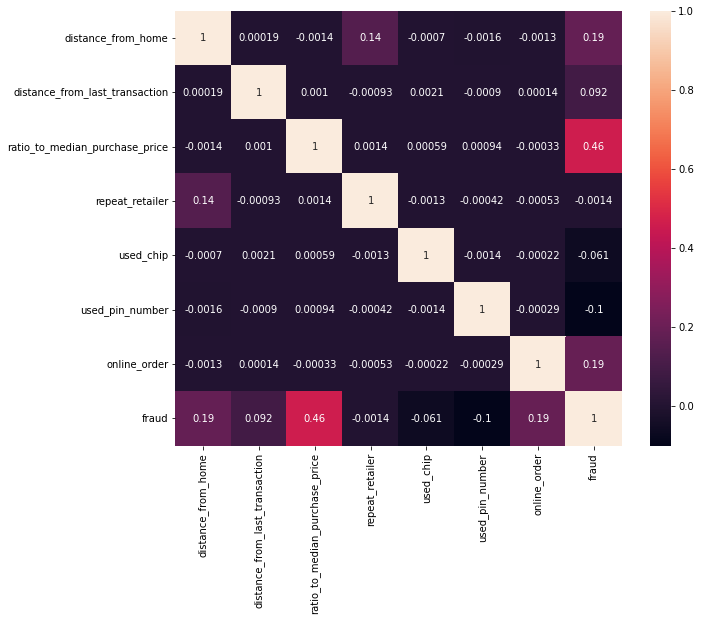

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
print('Unique values of target variables are:-', df['fraud'].unique())


Unique values of target variables are:- [0. 1.]


In [ ]:
# The target variable has two variables 0 and 1 respectively. Here 0 is for No fraud transactions and 1 is for fraud transactions

In [ ]:
print('Number of samples under each target value :- \n',df['fraud'].value_counts())

Number of samples under each target value :- 
 0.0    912597
1.0     87403
Name: fraud, dtype: int64


In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
# NOW WE ARE TRANSFORMING THE DATA 

In [ ]:
sc = StandardScaler()
amount = df['distance_from_home'].values

df['distance_from_home'] = sc.fit_transform(amount.reshape(-1,1))

In [ ]:
print(df['distance_from_home'].head())

0    0.477882
1   -0.241607
2   -0.329369
3   -0.372854
4    0.268572
Name: distance_from_home, dtype: float64


In [ ]:
# Splitting the dataset for the Fraud Detection Model

In [ ]:
x = df.drop('fraud', axis=1).values
y = df['fraud'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [ ]:
print('X_train Samples :-', X_train[:1])

X_train Samples :- [[-0.35339769  0.98914273  0.63420962  1.          1.          0.
   1.        ]]


In [ ]:
print('X_test Samples :-', X_train[0:1])

X_test Samples :- [[-0.35339769  0.98914273  0.63420962  1.          1.          0.
   1.        ]]


In [ ]:
print('y_train Samples :-', y_train[0:20])

y_train Samples :- [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print('y_test Samples :-', y_train[0:20])

y_test Samples :- [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print('Shape of X_Train dataset')
print('--------------------------')
print(X_train.shape)

print('Shape of y_Train dataset')
print('------------------------')
print(y_train.shape)


#print('Shape of X_test dataset')
#print('-----------------------')
#print(X_test.shape)

print('Shape of y_test dataset')
print('---------------------')
print(y_test.shape)


Shape of X_Train dataset
--------------------------
(800000, 7)
Shape of y_Train dataset
------------------------
(800000,)
Shape of y_test dataset
---------------------
(200000,)


In [ ]:
# MODELLING OF MINOR PROJECT 

In [ ]:
#DECISION TREE

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)


In [ ]:
print('-------------Accuracy Score---------------')
print('Accuracy score of the decision tree', (accuracy_score(y_test, tree_pred)))


-------------Accuracy Score---------------
Accuracy score of the decision tree 0.979335


In [ ]:
print('----------------------F1 Score---------------------')
print('F1 score of the decision tree', (f1_score(y_test, tree_pred)))

----------------------F1 Score---------------------
F1 score of the decision tree 0.8837313978676119


In [ ]:
print('-----------Confusion Matrix------------')
print('Confusion matrix of the decision tree :- \n', (confusion_matrix(y_test, tree_pred)))

-----------Confusion Matrix------------
Confusion matrix of the decision tree :- 
 [[180160   2455]
 [  1678  15707]]


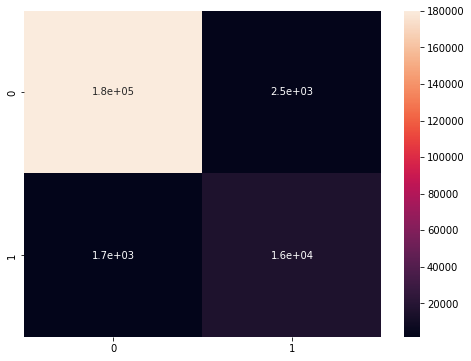

In [ ]:
cm = confusion_matrix(y_test, tree_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print('---------------Classification Report------------')
print('Confusion matrix of the decision tree :-\n', (classification_report(y_test, tree_pred)))

---------------Classification Report------------
Confusion matrix of the decision tree :-
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182615
         1.0       0.86      0.90      0.88     17385

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



1. K Nearest Neighbour Algorithm

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

N Nearest Neighbors 6 decided through Elbow method graphing in which we take N Neighbor values from 1-20 and then we store the outcomes in a dataset and then we plot a graph of that particular dataset and examine the graph. We will observe that there will be a threshold value at which the graph will be taking a shape like an elbow. According to studies it is better either to take the threshold value of that particular point or we take the values thar are near the threshold point for a good prediction.

In [ ]:
print('-------------------Accuracy score-------------')
print('Accuracy score of the KNN', (accuracy_score(y_test, knn_pred)))

-------------------Accuracy score-------------
Accuracy score of the KNN 0.995695


In [ ]:
print('---------------F1 Score------------------')
print('F1 score of the KNN', (f1_score(y_test, knn_pred)))

---------------F1 Score------------------
F1 score of the KNN 0.9750340708092905


In [ ]:
print('--------------Confusion Matrix------------')
print('Confusion matrix of the KNN :- \n', (confusion_matrix(y_test, knn_pred)))

--------------Confusion Matrix------------
Confusion matrix of the KNN :- 
 [[182326    289]
 [   572  16813]]


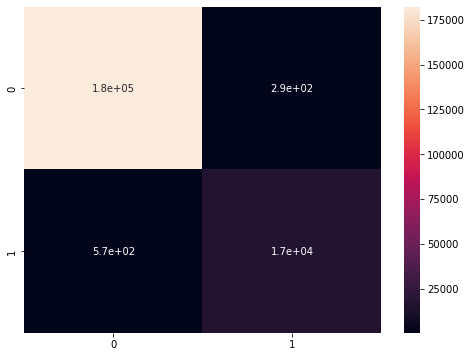

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print('---------------Classification Report------------')
print('Confusion matrix of the KNN :- \n', (classification_report(y_test, knn_pred)))

---------------Classification Report------------
Confusion matrix of the KNN :- 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182615
         1.0       0.98      0.97      0.98     17385

    accuracy                           1.00    200000
   macro avg       0.99      0.98      0.99    200000
weighted avg       1.00      1.00      1.00    200000



LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(y_test, lr_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.959145


In [ ]:
print('-----------F1 Score-----------')
print('F1 score of the logistic regression', (f1_score(y_test, lr_pred)))

-----------F1 Score-----------
F1 score of the logistic regression 0.7196046806904361


In [ ]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the logistic regression :- \n', (confusion_matrix(y_test, lr_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the logistic regression :- 
 [[181344   1271]
 [  6900  10485]]


In [ ]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the logistic regression :- \n', (classification_report(y_test, lr_pred)))

-----------Classification Report-----------
Confusion Matrix of the logistic regression :- 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Random forest', (accuracy_score(y_test, rf_pred)))

-----------Accuracy Score-----------
Accuracy score of the Random forest 0.999995


In [ ]:
print('-----------F1 Score-----------')
print('F1 score of the random forest', (f1_score(y_test, rf_pred)))

-----------F1 Score-----------
F1 score of the random forest 0.9999712387471599


In [ ]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the random forest :- \n', (confusion_matrix(y_test, rf_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the random forest :- 
 [[182615      0]
 [     1  17384]]


In [ ]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the random forest :- \n', (classification_report(y_test, rf_pred)))

-----------Classification Report-----------
Confusion Matrix of the random forest :- 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182615
         1.0       1.00      1.00      1.00     17385

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



ROC - AUC CURVE

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
#ForDecisionTree
score = roc_auc_score(y_test, tree_pred)
print('ROC-AUC Score is:-', score)

ROC-AUC Score is:- 0.9450182140044192


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, tree_pred)

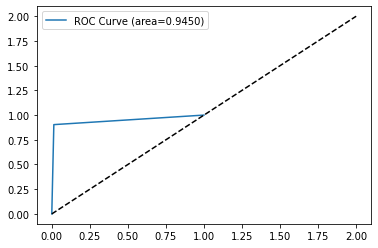

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.4f)' % score)
plt.plot([0,2], [0,2], 'k--')
plt.legend()
plt.show()

In [ ]:
#ForRandomForest
rf_score = roc_auc_score(y_test, rf_pred)
print('ROC-AUC Score is:-', rf_score)

ROC-AUC Score is:- 0.9999712395743456


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

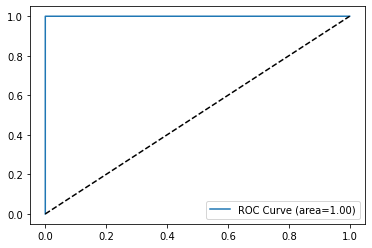

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % rf_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()